In [1]:
"""
Rhode Schwarz (BatMaus) Demo
Author: Andrei V.
"""

# from slab import *
# from slab.datamanagement import SlabFile
import numpy as np
import os
import datetime
import os.path
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib notebook

import RhodeSchwarz
reload(RhodeSchwarz)

from RhodeSchwarz import RhodeSchwarz
from RhodeSchwarz import ZVB8


C:\ProgramData\Anaconda3\envs\py36vis\lib\site-packages\IPython\qt.py:13: ShimWarning: The `IPython.qt` package has been deprecated since IPython 4.0. You should import from qtconsole instead.
  "You should import from qtconsole instead.", ShimWarning)


Could not load InstrumentManagerWindow
Could not load labbrick
Could not load Autonics TM4 Driver
Could not load Oxford Trition driver


In [6]:
baddata = ['1,2,3,4,5']

In [7]:
float(baddata)

TypeError: float() argument must be a string or a number, not 'list'

In [11]:
baddata[0].split( ',')

['1', '2', '3', '4', '5']

In [2]:
# rs = RhodeSchwarz(address='192.168.14.190')
rs = ZVB8(address='192.168.14.231', reset = True)

In [14]:
rs.get_id()

I'm Bat Mouse!


'Rohde-Schwarz,ZNB8-4Port,1311601044101437,3.20\n'

In [15]:
import time

In [16]:
rs.reset()

## Resonator readout scans

In [43]:
readfreqcenter = [6.180e9, 6.290e9, 6.405e9, 6.510e9, 6.610e9, 6.735e9, 6.835e9, 6.955e9]
drive_freq_start = [4.0e9,4.0e9,4.0e9,4.0e9,4.0e9,4.0e9,4.0e9,4.75e9]
drive_freq_stop = [6.05e9,6.05e9,6.05e9,6.05e9,6.05e9,6.05e9,6.05e9,5.25e9]

In [45]:
dataarray = []
resonatorbw = 40e6
# for ii in [0,1,2,3,4,5,6]:
for ii in [0]:
    rs.reset()
    time.sleep(0.2)
    trans_settings = rs.trans_default_settings()
    trans_settings['start_freq'] = readfreqcenter[ii]-resonatorbw/2
    trans_settings['stop_freq'] = readfreqcenter[ii]+resonatorbw/2
    trans_settings['avg_time'] = 10
    trans_settings['ifBW'] = 1000
    trans_settings['RFpower'] = -25
    trans_settings['freq_points'] = 1001
    trans_settings
    dataarray.append(rs.trans_meas(trans_settings))

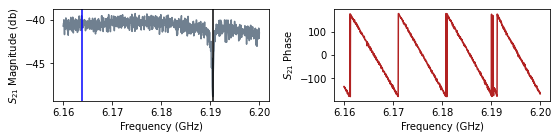

In [46]:
omegaresgarray = []
# for ii in [0,1,2,3,4,5,6]:
for ii in [0]:
    data = dataarray[ii]
    
    mag = np.array([float(i) for i in (data['mag'].split(','))])
    phase = np.array([float(i) for i in (data['phase'].split(','))])
    freq = np.array([float(i) for i in (((data['xaxis']).tolist()).split(','))])/1e9

    fig, ax = plt.subplots(1,2,figsize=(8, 2));

    ax1 = ax[0]
    ax1.plot(freq,mag, color = 'slategrey')
#     yhat = savgol_filter(y, 51, 3)
#     p = fitlor(data['freq']/1e9,savgol_filter(data['mag'],51,7))
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Magnitude (db)');
#     ax1.set_xlim(span)
#     ax1.axvline(p[2] , color = 'k')
    ax1.axvline((freq)[np.argmin(mag)] , color = 'k')
    ax1.axvline(importedomegaresgarray[ii],color = 'b',label = 'importedomegares')

    ax1 = ax[1]
    ax1.plot(freq,phase, color = 'firebrick')
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Phase');
#     ax1.set_xlim(span)
#     ax1.axvline(marker , color = 'k')

    plt.tight_layout()
    
    omegaresgarray.append((freq)[np.argmin(mag)])

## Two tone Spec across lattice

In [50]:
drive_freq_start[ii]

4000000000.0

In [51]:
drive_freq_stop[ii]

6050000000.0

In [52]:
omegaresgarray[ii]

6.19052

In [59]:
dataarray = []
for ii in [0]:
# for ii in [0]:
    rs.reset()
    spec_settings = rs.spec_default_settings()
    spec_settings['CAVport'] = 1
    spec_settings['RFport'] = 3
    spec_settings['Mport'] = 2

    spec_settings['start_freq'] = drive_freq_start[ii]
    spec_settings['stop_freq'] = drive_freq_stop[ii]
    spec_settings['RFpower'] = -10
    spec_settings['CAVfreq'] = omegaresgarray[ii]*1e9
    spec_settings['CAVpower'] = -25
    spec_settings['avg_time'] = 10
    spec_settings['ifBW'] = 1000
    spec_settings['freq_points'] = 501
    spec_settings['measurement'] = 'S21'
#     print(spec_settings)
    
    dataarray.append(rs.spec_meas(spec_settings))

In [60]:
from scipy.signal import savgol_filter
from slab.dsfit import fitlor
from slab.dsfit import lorfunc

[5.9579067]


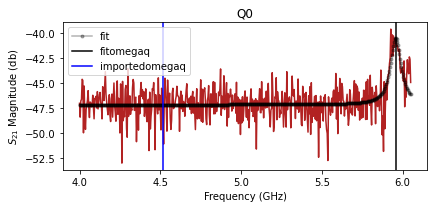

In [61]:
omegaqgarray = []
for ii in [0]:
# for ii in [0]:
    data = dataarray[ii]
    
    mag = np.array([float(i) for i in (data['mag'].split(','))])
    phase = np.array([float(i) for i in (data['phase'].split(','))])
    freq = np.array([float(i) for i in (((data['xaxis']).tolist()).split(','))])/1e9
    
    
    fig, ax = plt.subplots(figsize=(6, 3));
    ax1 = ax
    ax1.plot(freq, mag, color = 'firebrick')
    p = fitlor(freq, mag)
    ax1.plot(freq, lorfunc(p, freq), 'k.-', label='fit',alpha = 0.3)
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Magnitude (db)');
    ax1.axvline(p[2] , color = 'k',label = 'fitomegaq')
    ax1.axvline(importedomegaqgarray[ii],color = 'b',label = 'importedomegaq')
    plt.title("Q%s"%ii)
    plt.tight_layout()
    plt.legend()
    
    omegaqgarray.append(p[2])
print(np.array(omegaqgarray))

In [62]:
omegaqgarray

[5.957906697565522]

## Looks like DACBox isn't tuning qubits - likely open on Q3's flux line! 